# pytorch数据增广简单介绍

* 在语言里面加入各种不同的背景噪音

* 改变图片的颜色和形状

* 翻转，切割等操作

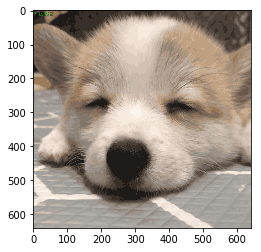

In [3]:

%matplotlib inline
import torch
import torchvision
from PIL import Image
from torch import nn
#from d2l import torch as d2l
import matplotlib.pyplot as plt
#d2l.set_figsize()
img = Image.open(r'dog.jpg')
plt.imshow(img)


* 绘图函数

In [4]:

def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

## transforms方法

In [5]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y=[]
    for _ in range(num_rows * num_cols):
        Y.append(aug(img))
    show_images(Y, num_rows, num_cols, scale=scale)


* 翻转和裁剪

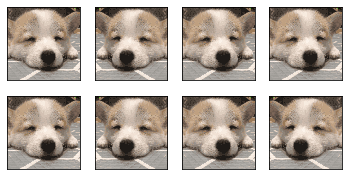

In [6]:
apply(img, torchvision.transforms.RandomHorizontalFlip())    #旋转（左右）

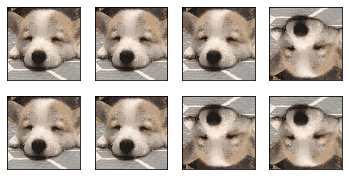

In [7]:
apply(img, torchvision.transforms.RandomVerticalFlip())   #旋转（上下）

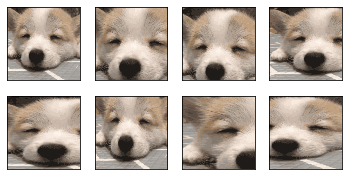

In [8]:
shape_aug = torchvision.transforms.RandomResizedCrop((300, 300), scale=(0.1, 1), ratio=(0.5, 2))  
#输出图像大小，scale ：面积比变化区间，ratio ； 宽高比变化区间
apply(img, shape_aug)


* 改变颜色

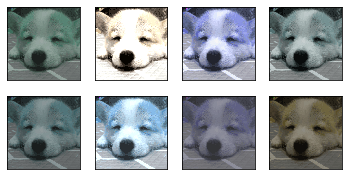

In [9]:
color_aug = torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
#亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）
apply(img, color_aug)

* 多种图像增广方法混合

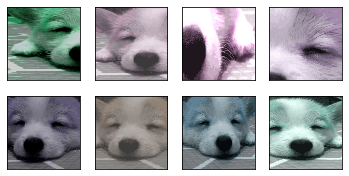

In [10]:
augs = torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
#混合了旋转，颜色变换，裁剪
apply(img, augs)